<a href="https://colab.research.google.com/github/nahaerin/Project_stock/blob/main/project_210128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 & 데이터

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 한글 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 13 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,450 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 146374 files and d

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.font_manager import fontManager 
set(sorted([f.name for f in fontManager.ttflist]))
sns.set(style='darkgrid')
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False

## 데이터

In [ ]:
cd /content/drive/MyDrive/Multicampus/Python/Project

/content/drive/MyDrive/Multicampus/Python/Project


주식데이터 저장하는 법

``` python
!pip install -U finance-datareader
import FinanceDataReader as fdr   # 주식데이터

df_close.to_csv('kospi200_close.csv', encoding='cp949') 

kospi200 = pd.read_excel("drive/MyDrive/Multicampus/Python/Project/코스피 200.xlsx")
name = kospi200["종목명"]
code = kospi200["종목코드"].astype('str')
code = [c.rjust(6,'0') for c in code]

# KOSPI 200 데이터의 종가만 가져오기
df_close = pd.concat([fdr.DataReader(code[0],'2020')['Close'], fdr.DataReader(code[1],'2020')['Close']], axis=1)
for c in code[2:]:
    df_close = pd.concat([df_close, fdr.DataReader(c,'2020')['Close']], axis=1)

df_close.to_csv('kospi200_close.csv', index=False)
```

In [ ]:
df_kospi = pd.read_csv('kospi200_close.csv', encoding = 'CP949', index_col=0)
#df_kospi = df_kospi.transpose()
df_kospi.head(3)

,삼성전자,SK하이닉스,LG화학,NAVER,삼성바이오로직스,삼성SDI,현대차,셀트리온,카카오,기아차,현대모비스,LG전자,삼성물산,SK이노베이션,LG생활건강,SK,POSCO,엔씨소프트,SK텔레콤,LG,KB금융,신한지주,삼성에스디에스,삼성전기,한국전력,삼성생명,아모레퍼시픽,SK바이오팜,KT&G,넷마블,하나금융지주,롯데케미칼,한온시스템,포스코케미칼,한화솔루션,삼성화재,LG디스플레이,S-Oil,고려아연,현대글로비스,...,롯데칠성,일양약품,KG동부제철,현대홈쇼핑,S&T모티브,후성,코오롱인더,한국콜마,더블유게임즈,JW중외제약,동국제강,오리온홀딩스,넥센타이어,삼양식품,현대그린푸드,한섬,휴켐스,롯데하이마트,CJ CGV,코스맥스,이노션,빙그레,SPC삼립,한일현대시멘트,HDC,애경산업,동원F&B,LIG넥스원,풍산,GKL,쿠쿠홈시스,남선알미늄,태영건설,한전기술,한세실업,LG하우시스,락앤락,삼양사,쿠쿠홀딩스,화승엔터프라이즈
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-02,55200,94700,314000,182500,428500,232000,118000,176762,152500,42500,247500,71000,107500,146500,1266000,258000,236000,541000,234000,71100,46550,42600,192000,126500,28500,73100,207500,NaN,92500,90300,35950,218500,10800,46321,17932,238500,16350,91900,424000,138500,...,136500,22850,7730,79800,43600,8130,49450,48500,49800,29074,5850,17550,8900,89100,11650,31300,20600,30600,31204,83800,70000,56300,86200,30250,10900,29350,223500,31750,23300,19450,43450,3335,5875,20000,17350,54900,14000,50000,103500,16900
2020-01-03,55500,94500,311000,181500,422000,229000,116000,174307,152500,42000,250000,71100,107500,149500,1263000,256500,237000,565000,234000,71600,47150,42750,192500,127500,28250,73300,206500,NaN,92500,90600,36200,216000,10650,46790,18611,237000,16250,93500,425500,138000,...,137000,22650,7700,80600,43550,8210,49250,47500,50100,28880,5900,17600,8950,92600,11550,31600,20450,30400,30841,81500,69100,57500,85400,30250,10800,29450,222500,32850,23750,19600,43450,3350,5875,20050,17250,55500,14000,50300,104500,16750
2020-01-06,55500,94300,307000,180500,412000,230000,116000,169888,154500,41900,249500,69900,106000,148000,1249000,251000,231000,579000,231500,71500,46600,42100,190500,127500,27600,72700,207000,NaN,92700,87800,35450,209000,10700,46743,18029,234000,16000,93400,421500,137500,...,135000,21850,7700,78300,42400,7970,47400,45600,48950,28005,5730,17200,8890,92400,11300,31300,20000,29500,29843,78600,67900,57200,85000,29100,10400,28600,218000,33600,23150,19050,42500,3405,5700,19250,16950,54600,13950,49300,102500,16600


In [ ]:
# 결측값
df_kospi.columns[df_kospi.isnull().sum() != 0]

Index(['SK바이오팜', '빅히트', 'DL이앤씨'], dtype='object')

In [ ]:
print("SK바이오팜 결측값 수 : ", df_kospi['SK바이오팜'].isnull().sum())
print("빅히트 결측값 수 : ", df_kospi['빅히트'].isnull().sum())
print("DL이앤씨 결측값 수 : ", df_kospi['DL이앤씨'].isnull().sum())

SK바이오팜 결측값 수 :  124
빅히트 결측값 수 :  194
DL이앤씨 결측값 수 :  263


In [ ]:
# 결측이 있는 기간
df_kospi['SK바이오팜'].loc[df_kospi['SK바이오팜'].isnull()].index.min(), df_kospi['SK바이오팜'].loc[df_kospi['SK바이오팜'].isnull()].index.max()

('2020-01-02', '2020-07-01')

In [ ]:
# 결측이 있는 기간
df_kospi['빅히트'].loc[df_kospi['빅히트'].isnull()].index.min(), df_kospi['빅히트'].loc[df_kospi['빅히트'].isnull()].index.max()

('2020-01-02', '2020-10-14')

In [ ]:
# 결측이 있는 기간
df_kospi['DL이앤씨'].loc[df_kospi['DL이앤씨'].isnull()].index.min(), df_kospi['DL이앤씨'].loc[df_kospi['DL이앤씨'].isnull()].index.max()

('2020-01-02', '2021-01-22')

In [ ]:
# 결측 있는 종목 뺌
df_kospi = df_kospi.drop(['SK바이오팜', '빅히트', 'DL이앤씨'], axis=1)

In [ ]:
# 스케일링 (정규화)
from sklearn.preprocessing import StandardScaler

df_kospi_scaled = pd.DataFrame(StandardScaler().fit_transform(df_kospi), columns = df_kospi.columns, index = df_kospi.index)
df_kospi_scaled.head(3)

,삼성전자,SK하이닉스,LG화학,NAVER,삼성바이오로직스,삼성SDI,현대차,셀트리온,카카오,기아차,현대모비스,LG전자,삼성물산,SK이노베이션,LG생활건강,SK,POSCO,엔씨소프트,SK텔레콤,LG,KB금융,신한지주,삼성에스디에스,삼성전기,한국전력,삼성생명,아모레퍼시픽,KT&G,넷마블,하나금융지주,롯데케미칼,한온시스템,포스코케미칼,한화솔루션,삼성화재,LG디스플레이,S-Oil,고려아연,현대글로비스,한국조선해양,...,롯데칠성,일양약품,KG동부제철,현대홈쇼핑,S&T모티브,후성,코오롱인더,한국콜마,더블유게임즈,JW중외제약,동국제강,오리온홀딩스,넥센타이어,삼양식품,현대그린푸드,한섬,휴켐스,롯데하이마트,CJ CGV,코스맥스,이노션,빙그레,SPC삼립,한일현대시멘트,HDC,애경산업,동원F&B,LIG넥스원,풍산,GKL,쿠쿠홈시스,남선알미늄,태영건설,한전기술,한세실업,LG하우시스,락앤락,삼양사,쿠쿠홀딩스,화승엔터프라이즈
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-02,-0.396985,0.193255,-1.202603,-1.222910,-1.731305,-1.333265,-0.528361,-1.252622,-1.414559,-0.085540,0.597279,-0.316939,-0.311360,0.077056,-1.065217,0.804719,0.805227,-2.147775,0.499901,-0.269771,1.397348,2.744249,0.984915,-0.463431,2.420975,1.088963,1.351979,1.766845,-1.034461,1.270950,0.173246,-0.34155,-1.077814,-0.779924,2.867133,0.701565,2.908522,1.123548,-0.004413,2.015953,...,2.442454,-1.407585,-0.988405,1.181760,-0.180404,-0.386923,2.364940,0.789403,-1.054069,-0.700311,-0.043869,2.946725,2.891709,-1.301198,3.014843,0.505283,0.285905,0.315056,2.605732,-0.721889,1.660384,-0.213391,2.369422,0.682571,0.819095,1.463925,1.912074,0.468230,-0.057333,1.748885,1.530180,-1.930849,-1.353709,2.102150,1.001101,-0.381204,1.854696,0.074958,1.257413,1.797462
2020-01-03,-0.367669,0.179930,-1.217371,-1.240734,-1.778390,-1.356006,-0.572105,-1.291292,-1.414559,-0.121032,0.658558,-0.313131,-0.311360,0.143992,-1.086847,0.768790,0.834195,-1.932190,0.499901,-0.226025,1.510337,2.782455,1.017433,-0.421703,2.327076,1.104972,1.303208,1.766845,-1.023378,1.327760,0.113188,-0.39852,-1.057876,-0.732498,2.780273,0.667346,3.092297,1.178437,-0.018782,2.282230,...,2.480977,-1.416418,-0.999038,1.285264,-0.185918,-0.340179,2.328716,0.549918,-1.028956,-0.746891,-0.009899,2.985188,2.941247,-1.031049,2.925427,0.578109,0.243019,0.278720,2.496380,-0.896264,1.540526,0.012217,2.259885,0.682571,0.725538,1.495920,1.858850,0.720305,0.071546,1.807120,1.530180,-1.912095,-1.353709,2.137020,0.968136,-0.332286,1.854696,0.101913,1.366899,1.720957
2020-01-06,-0.367669,0.166606,-1.237063,-1.258559,-1.850828,-1.348426,-0.572105,-1.360899,-1.393934,-0.128130,0.646303,-0.358822,-0.416752,0.110524,-1.187784,0.637047,0.660391,-1.806432,0.368010,-0.234774,1.406763,2.616896,0.887361,-0.421703,2.082939,1.056946,1.327594,1.805488,-1.126825,1.157332,-0.054974,-0.37953,-1.059874,-0.773149,2.606553,0.581797,3.080811,1.032066,-0.033150,2.149092,...,2.326886,-1.451751,-0.999038,0.987691,-0.312748,-0.480409,1.993649,0.094897,-1.125221,-0.956981,-0.125398,2.677479,2.881801,-1.046486,2.701885,0.505283,0.114362,0.115203,2.195736,-1.116127,1.380715,-0.044185,2.205117,0.346323,0.351311,1.223962,1.619343,0.892174,-0.100293,1.593590,1.249018,-1.843333,-1.437737,1.579094,0.869242,-0.405663,1.820307,0.012064,1.147926,1.644452


# Correlation

In [ ]:
df_kospi_scaled_corr = df_kospi_scaled.corr()
df_kospi_scaled_corr

,삼성전자,SK하이닉스,LG화학,NAVER,삼성바이오로직스,삼성SDI,현대차,셀트리온,카카오,기아차,현대모비스,LG전자,삼성물산,SK이노베이션,LG생활건강,SK,POSCO,엔씨소프트,SK텔레콤,LG,KB금융,신한지주,삼성에스디에스,삼성전기,한국전력,삼성생명,아모레퍼시픽,KT&G,넷마블,하나금융지주,롯데케미칼,한온시스템,포스코케미칼,한화솔루션,삼성화재,LG디스플레이,S-Oil,고려아연,현대글로비스,한국조선해양,...,롯데칠성,일양약품,KG동부제철,현대홈쇼핑,S&T모티브,후성,코오롱인더,한국콜마,더블유게임즈,JW중외제약,동국제강,오리온홀딩스,넥센타이어,삼양식품,현대그린푸드,한섬,휴켐스,롯데하이마트,CJ CGV,코스맥스,이노션,빙그레,SPC삼립,한일현대시멘트,HDC,애경산업,동원F&B,LIG넥스원,풍산,GKL,쿠쿠홈시스,남선알미늄,태영건설,한전기술,한세실업,LG하우시스,락앤락,삼양사,쿠쿠홀딩스,화승엔터프라이즈
삼성전자,1.000000,0.901026,0.818018,0.524090,0.508661,0.885769,0.887039,0.598962,0.651531,0.940458,0.922319,0.915263,0.900690,0.936225,0.710217,0.584409,0.910209,0.570288,0.765067,0.849794,0.743682,0.355225,0.611408,0.959610,0.565901,0.840318,0.697598,0.306425,0.308067,0.806434,0.855374,0.928451,0.883095,0.791100,0.183724,0.914516,0.286036,0.499252,0.853844,0.557213,...,0.319059,0.221813,0.064760,0.711409,0.746888,0.860769,0.678551,0.715136,0.045488,0.221536,0.868421,-0.024090,0.263879,-0.213279,0.334476,0.313870,0.784764,0.581670,0.595660,0.359510,0.409184,-0.076506,0.349229,0.391022,0.695521,0.074701,-0.049396,0.479954,0.879736,0.290925,0.376212,-0.268466,0.795129,0.311882,0.592493,0.730216,0.034190,0.584141,0.513359,0.291991
SK하이닉스,0.901026,1.000000,0.544198,0.179060,0.239232,0.675554,0.640688,0.373757,0.321996,0.783140,0.794620,0.716594,0.806732,0.785460,0.465660,0.583804,0.874002,0.359928,0.568018,0.666656,0.699004,0.492334,0.677380,0.835847,0.722320,0.755314,0.789685,0.312451,-0.060267,0.769590,0.777331,0.765792,0.675390,0.506217,0.302188,0.794843,0.553356,0.467991,0.698444,0.700824,...,0.558287,-0.125634,-0.016046,0.767415,0.467405,0.660569,0.657741,0.552504,-0.231545,-0.007653,0.669059,0.210888,0.465241,-0.272688,0.505816,0.164084,0.628146,0.388531,0.656009,0.031070,0.568003,-0.114709,0.518650,0.423323,0.514342,0.359826,0.186799,0.275204,0.675192,0.568638,0.174760,-0.307050,0.520304,0.430612,0.412171,0.563393,0.160377,0.262579,0.496858,0.424261
LG화학,0.818018,0.544198,1.000000,0.872329,0.841340,0.960507,0.927875,0.854902,0.944304,0.865747,0.754175,0.882893,0.791055,0.870611,0.836657,0.463757,0.678865,0.798955,0.756047,0.824119,0.517846,-0.017611,0.260609,0.838540,0.134150,0.638680,0.328675,0.096904,0.688594,0.570683,0.723895,0.889845,0.951826,0.935948,-0.106641,0.736105,-0.161515,0.319316,0.774527,0.135638,...,-0.145013,0.663110,0.284894,0.391553,0.870252,0.840823,0.400632,0.622706,0.450595,0.549782,0.900897,-0.411194,-0.185595,0.021708,-0.085713,0.441524,0.730010,0.692970,0.253204,0.677405,-0.029781,0.072068,-0.020049,0.229018,0.676224,-0.384457,-0.408132,0.572839,0.889568,-0.221735,0.453783,-0.015668,0.961145,-0.060943,0.566192,0.801392,-0.256498,0.789517,0.241502,-0.078591
NAVER,0.524090,0.179060,0.872329,1.000000,0.908321,0.794579,0.736211,0.854845,0.971439,0.628447,0.542088,0.702539,0.578588,0.665269,0.780572,0.445533,0.391070,0.855417,0.662340,0.687656,0.270522,-0.166652,0.141766,0.626630,-0.135048,0.355514,0.051689,0.041020,0.806789,0.338552,0.421284,0.612671,0.805413,0.799834,-0.161438,0.484249,-0.349247,0.172687,0.545779,-0.113024,...,-0.306746,0.869954,0.454385,0.134192,0.824259,0.700966,0.246200,0.567040,0.790945,0.757522,0.763157,-0.476070,-0.336210,0.366675,-0.192778,0.654987,0.511735,0.797693,0.068632,0.832016,-0.334586,0.346195,-0.153165,0.248041,0.571495,-0.552410,-0.414740,0.705721,0.757039,-0.490576,0.471788,0.289476,0.874026,-0.230085,0.457891,0.778663,-0.232828,0.835082,0.071761,-0.239436
삼성바이오로직스,0.508661,0.239232,0.841340,0.908321,1.000000,0.794972,0.638058,0.945794,0.903732,0.570463,0.436789,0.622610,0.638871,0.625946,0.718678,0.508081,0.389337,0.908163,0.534882,0.627092,0.207911,-0.203130,0.105725,0.600495,-0.145364,0.278756,0.019527,-0.041955,0.652304,0.302523,0.433801,0.584456,0.788847,0.711576,-0.197031,0.366634,-0.277769,0.070639,0.468569,-0.112316,...,-0.286602,0.835557,0.602971,0.118090,0.686002,0.626456,0.140363,0.443178,0.756594,0.811302,0.753144,-0.494309,-0.387658,0.460421,-0.229996,0.639894,0.456793,0.759887,0.003849,0.699531,-0.398158,0.3997

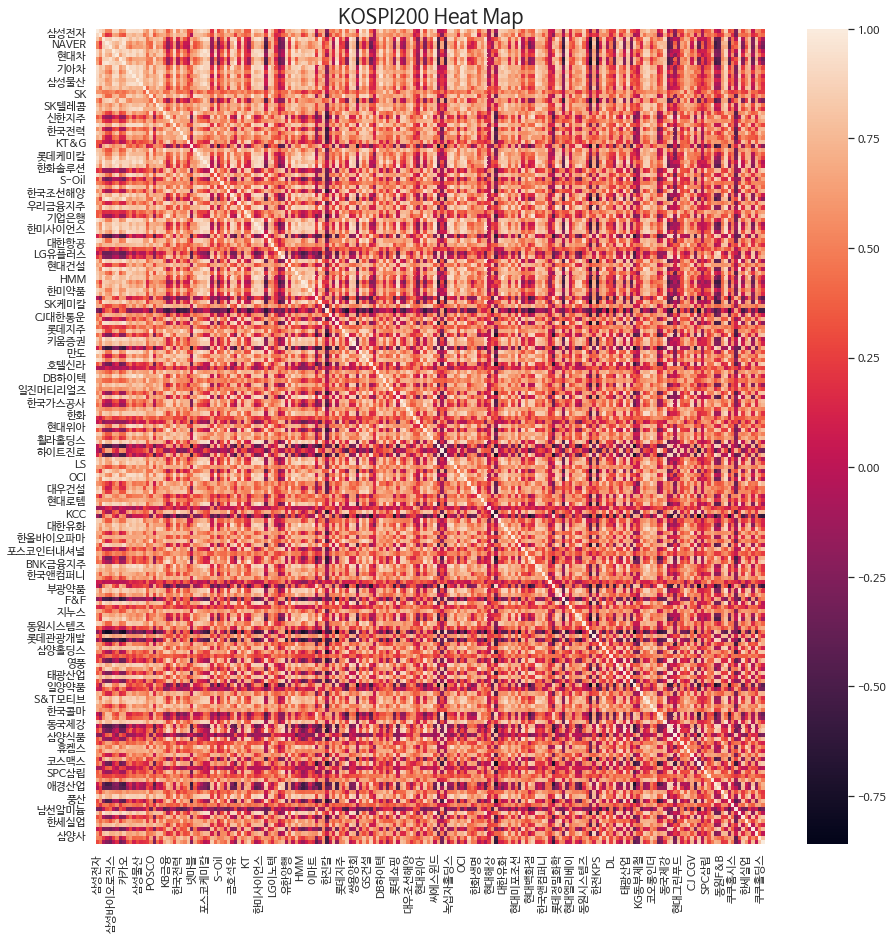

In [ ]:
# 상관계수 히트맵
plt.figure(figsize=(15,15))
sns.heatmap(df_kospi_scaled.corr()) #annot=True,
plt.title('KOSPI200 Heat Map', fontsize=20)

plt.show()

In [ ]:
name = list(df_kospi_scaled.columns)

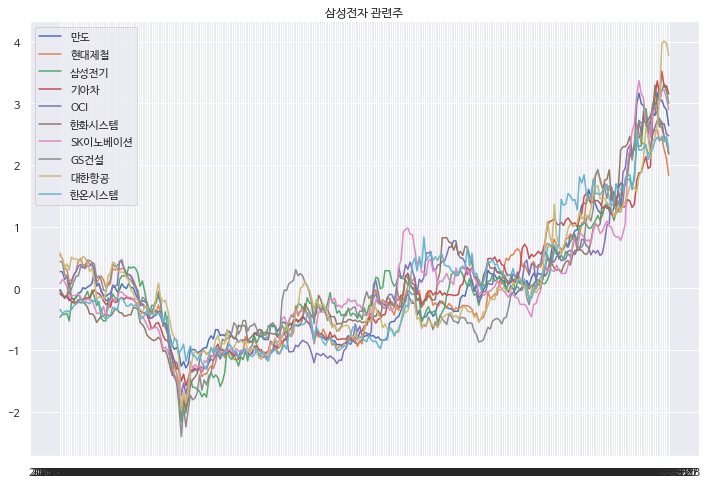

In [ ]:
# 삼성전자 상관계수 상위 10개 

aa = list(df_kospi_scaled_corr[name[0]].sort_values(ascending=False).drop(name[0])[:10].index)

plt.figure(figsize = (12, 8))
for a in aa:
    plt.plot(df_kospi_scaled[a])    

plt.title('삼성전자 관련주')
plt.legend(aa, loc='best')
plt.show()

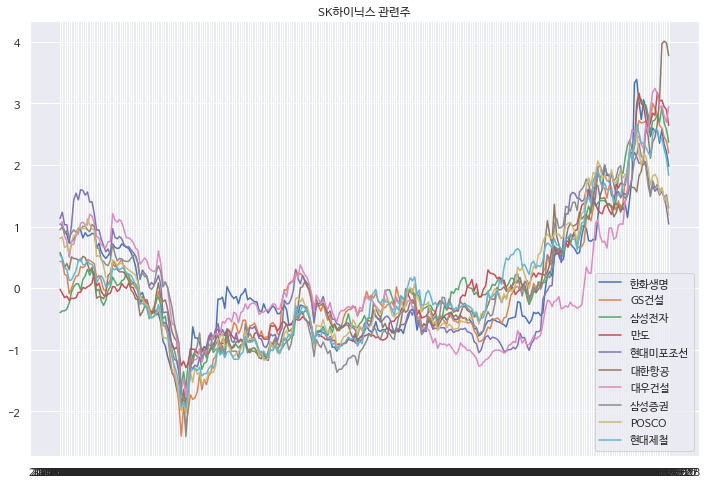

In [ ]:
# SK하이닉스 상관계수 상위 10개 

bb = list(df_kospi_scaled_corr[name[1]].sort_values(ascending=False).drop(name[1])[:10].index)

plt.figure(figsize = (12, 8))
for b in bb:
    plt.plot(df_kospi_scaled[b])    

plt.title('SK하이닉스 관련주')
plt.legend(bb, loc='best')
plt.show()

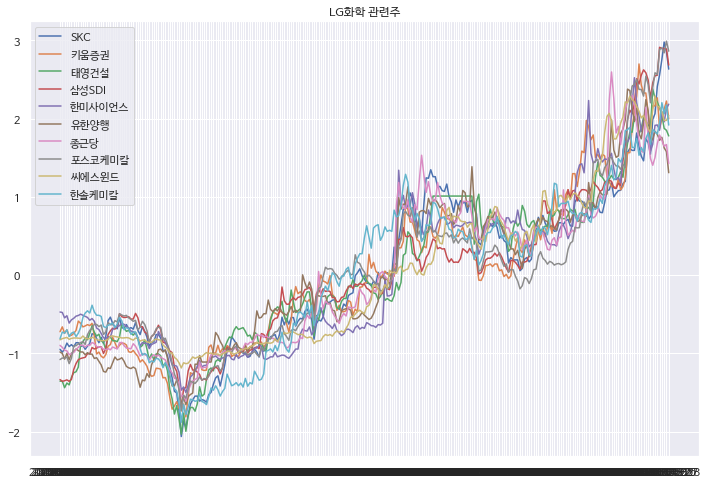

In [ ]:
# LG화학 상관계수 상위 10개 

cc = list(df_kospi_scaled_corr[name[2]].sort_values(ascending=False).drop(name[2])[:10].index)

plt.figure(figsize = (12, 8))
for c in cc:
    plt.plot(df_kospi_scaled[c])    

plt.title('LG화학 관련주')
plt.legend(cc, loc='best')
plt.show()

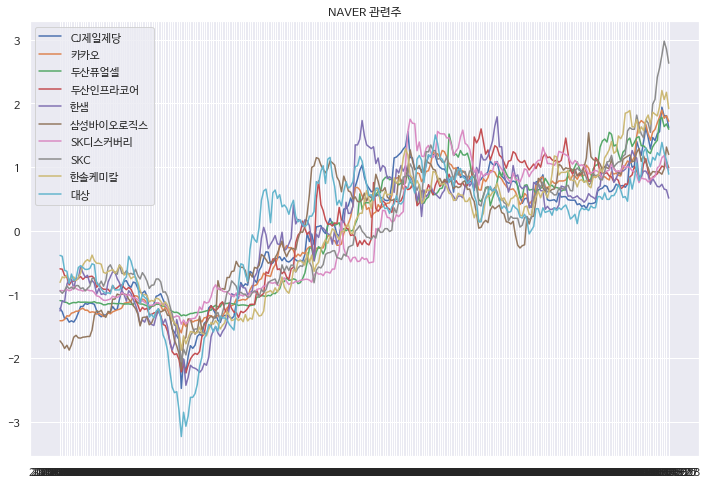

In [ ]:
# NAVER 상관계수 상위 10개 

dd = list(df_kospi_scaled_corr[name[3]].sort_values(ascending=False).drop(name[3])[:10].index)

plt.figure(figsize = (12, 8))
for d in dd:
    plt.plot(df_kospi_scaled[d])    

plt.title('NAVER 관련주')
plt.legend(dd, loc='best')
plt.show()